In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob


In [ ]:
file_paths = {
    "Gemma 2 2b": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/gemma_metrics.csv',
    "Phi3.5 INT4": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/phi_int4_metrics.csv',
    "Phi3.5 INT8": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/phi_int8_metrics.csv',
    "Qwen2.5 0.5B": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/qwen_0.5b_metrics.csv',
    "Qwen2.5 1.5B": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/qwen_1.5b_metrics.csv',
    "Qwen2.5 3B INT8": '/gdrive/MyDrive/Tesi_magistrale/metrics/OpenAI/qwen_3b_metrics.csv',
}

In [ ]:
test_df = pd.read_csv(file_paths["Gemma 2 2b"])
test_df['retrieved_contexts']

,retrieved_contexts
0,"['French border) to Genova, then SE and S to P..."
1,"[""No. 39070), a small port, lies at the SW end..."
2,['LAT 0.0m\nNote: Predicted heights are in me...
3,"[""Golfo Marconi\n10.20 Golfo Marconi (44°18'N...."
4,['Porto d’Ischia—Contact Information\nPort\nVH...
5,['passage through Canale di San Pietro. Pilots...
6,"[""18.18Caution.— Landslides may occur along th..."
7,['']
8,['15.15Winds—Weather.— The harbor is sheltered...
9,['']


In [ ]:

# Filtering rows where `retrieved_contexts` equals ['']
filtered_data = {}

for model_name, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        filtered_rows = df[df['retrieved_contexts'] == "['']"]
        filtered_data[model_name] = filtered_rows
    except Exception as e:
        filtered_data[model_name] = f"Error: {e}"

# Concatenating all the filtered results into a single dataset
# result_df = pd.concat([df for df in filtered_data.values() if not isinstance(df, str)], ignore_index=False)
# result_df




In [ ]:
all_filtered_data = []

for model_name, path in file_paths.items():
    try:
        df = pd.read_csv(path)
        # Filter rows where `retrieved_contexts` equals `['']`
        filtered_rows = df[df['retrieved_contexts'] == "['']"]
        if not filtered_rows.empty:
            # Add the model name as a new column
            filtered_rows['model_name'] = model_name
            all_filtered_data.append(filtered_rows)
    except Exception as e:
        print(f"Error processing {model_name}: {e}")

# Concatenate all filtered data into one DataFrame
if all_filtered_data:
    combined_filtered_df = pd.concat(all_filtered_data, ignore_index=True)
    #tools.display_dataframe_to_user(name="Combined Filtered Contexts with Model Names", dataframe=combined_filtered_df)
else:
    print("No data found matching the criteria in any dataset.")

<ipython-input-23-be66656282d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['model_name'] = model_name
<ipython-input-23-be66656282d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rows['model_name'] = model_name
<ipython-input-23-be66656282d9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

In [ ]:
combined_filtered_df

,user_input,retrieved_contexts,response,reference,llm_context_precision_without_reference,context_recall,factual_correctness,faithfulness,answer_relevancy,semantic_similarity,model_name
0,What are the main dangers in the port of Naples ?,[''],"I don't have access to real-time information, ...",The main dangers in the Port Of Naples are the...,0.0,0.0,0.00,0.0,0.000000,0.680291,Gemma 2 2b
1,Is it possible to land on the island of Pianos...,[''],I don't know. The provided context does not me...,No because it is a marine protected area. One ...,0.0,0.0,0.50,0.5,0.000000,0.312917,Gemma 2 2b
2,What is the marrobbio phenomenon ?,[''],The Marrobbio phenomenon is a phenomenon that ...,Marrobbio is a rare meteorological phenomenon ...,0.0,0.0,0.15,0.0,0.953724,0.786034,Gemma 2 2b
3,What are the navigational hazards near the isl...,[''],"I don't have access to real-time information, ...",A restricted area lies 4 miles W of Isola Gigl...,0.0,0.0,0.29,0.0,0.000000,0.611888,Gemma 2 2b
4,What currents are there in the port of Chioggia ?,[''],"I don't have access to real-time information, ...",Currents are strong and are mostly influenced ...,0.0,0.0,0.00,0.0,0.000000,0.375544,Gemma 2 2b
5,What are the main dangers in the port of Naples ?,[''],The main dangers in the port of Naples include...,The main dangers in the Port Of Naples are the...,0.0,0.0,0.36,0.0,0.991221,0.748599,Phi3.5 INT4
6,Is it possible to land on the island of Pianos...,[''],"Yes, it is possible to land on the island of P...",No because it is a marine protected area. One ...,0.0,0.0,0.00,0.0,1.000000,0.252460,Phi3.5 INT4
7,What is the marrobbio phenomenon ?,[''],The marrobbio phenomenon refers to the sudden ...,Marrobbio is a rare meteorological phenomenon ...,0.0,0.0,0.15,0.0,0.979643,0.818842,Phi3.5 INT4
8,What are the navigational hazards near the isl...,[''],The navigational hazards near the island of Gi...,A restricted area lies 4 miles W of Isola Gigl...,0.0,0.0,0.15,0.0,1.000000,0.655765,Phi3.5 INT4
9,What currents are there in the port of Chioggia ?,[''],"In the port of Chioggia, the Adriatic Sea's cu...",Currents are strong and are mostly influenced ...,0.0,0.0,0.00,0.0,0.884728,0.477578,Phi3.5 INT4


In [ ]:
combined_filtered_df.to_csv('combined_filtered_empty_contexts.csv', index=False)

In [ ]:
new_colors = ['#FFAF00', '#F46920', '#F53255', '#F857C1', '#29BDFD', '#00FFFF']  # Example palette


In [ ]:


# Metrics to plot
metrics = [
    "llm_context_precision_without_reference",
    "context_recall",
    "factual_correctness",
    "faithfulness",
    "answer_relevancy",
    "semantic_similarity"
]

# Preparing the data for plotting
grouped_data = combined_filtered_df.groupby("model_name")[metrics].mean()

# Plotting a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind="bar", ax=ax, width=0.8, color = new_colors)

# Customizing the plot
ax.set_title("Metrics Comparison Across Models", fontsize=16)
ax.set_xlabel("Model Name", fontsize=14)
ax.set_ylabel("Metric Values (Normalized)", fontsize=14)
ax.legend(title="Metrics", fontsize=10, title_fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()


NameError: name 'combined_filtered_df' is not defined

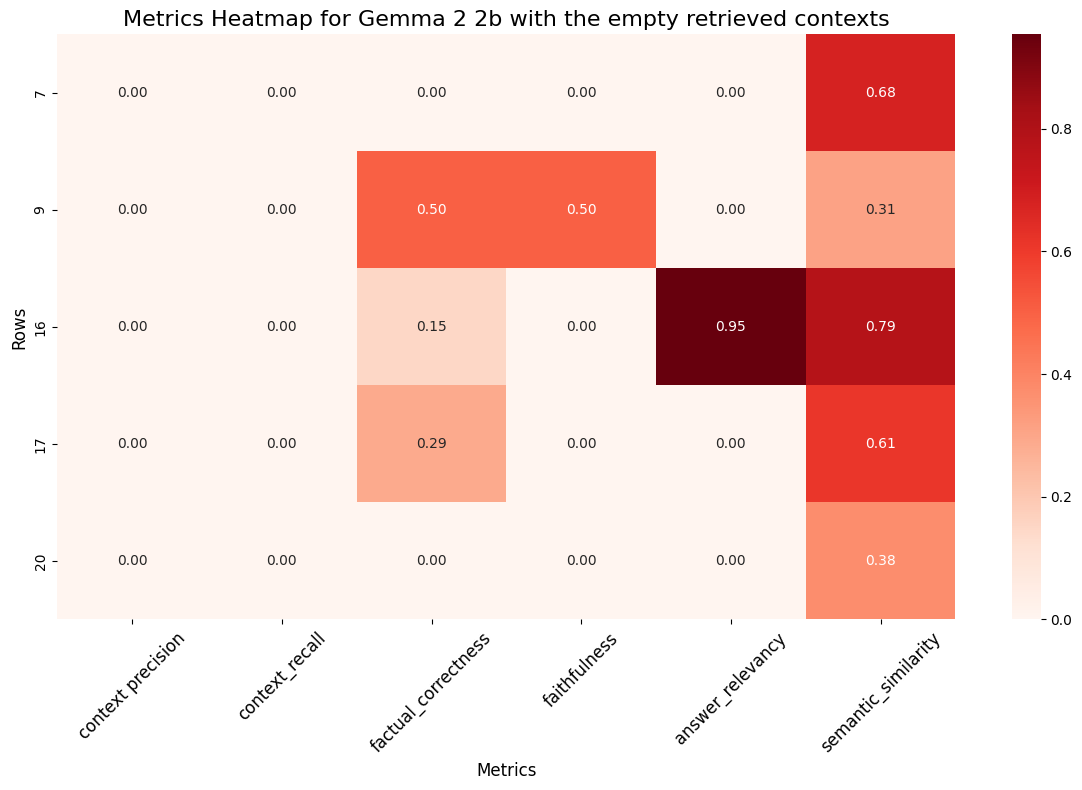

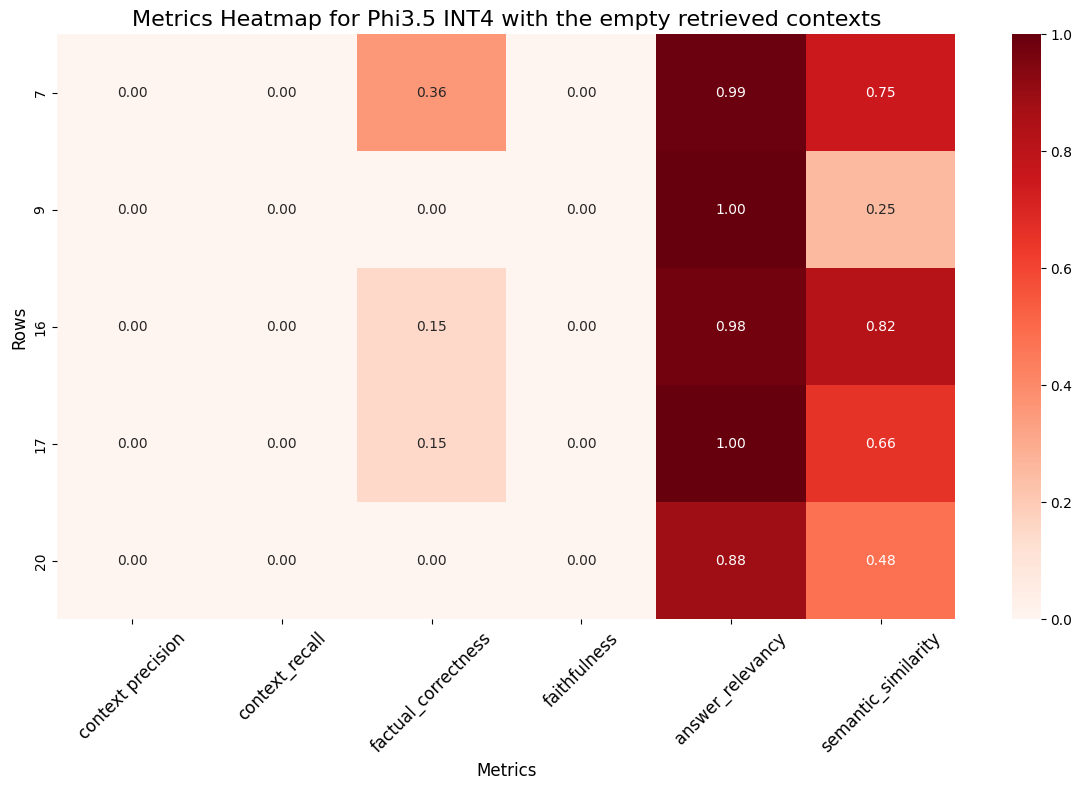

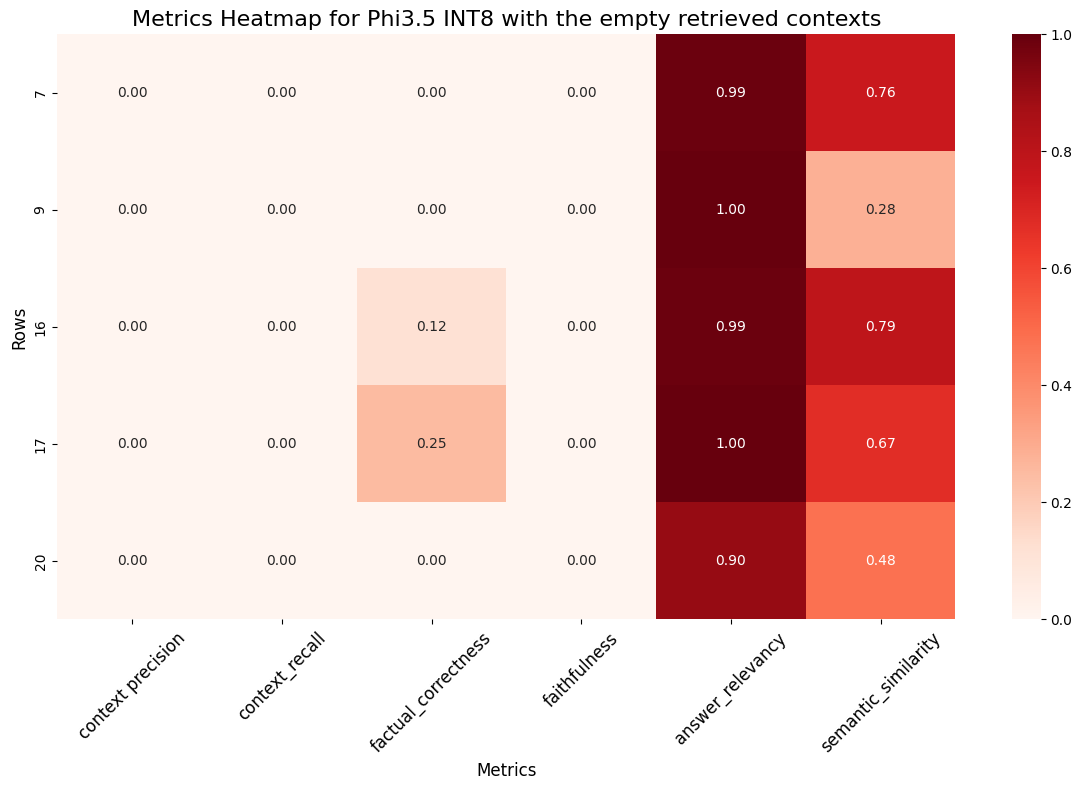

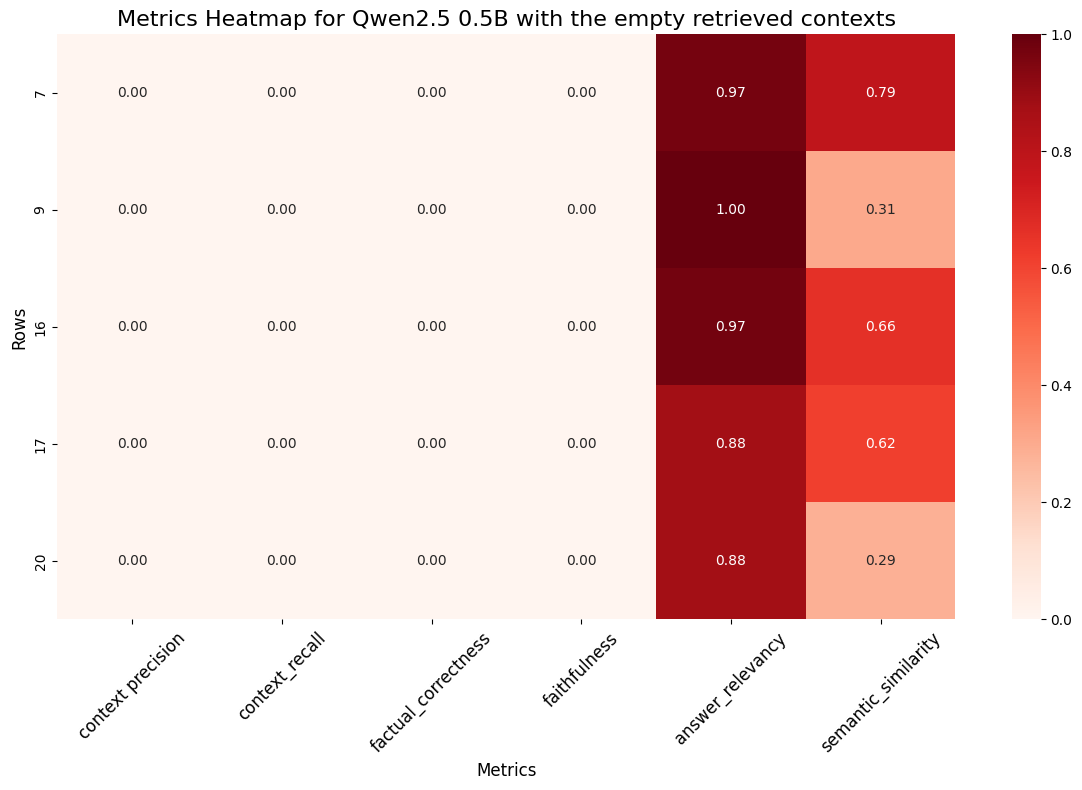

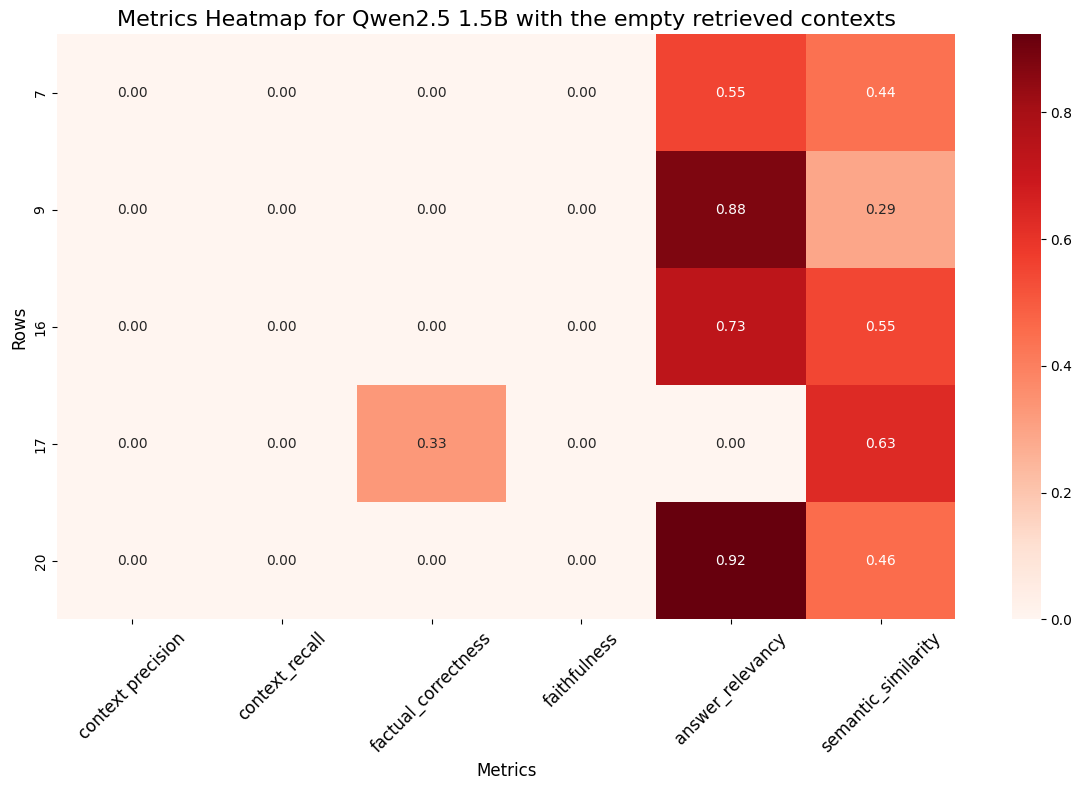

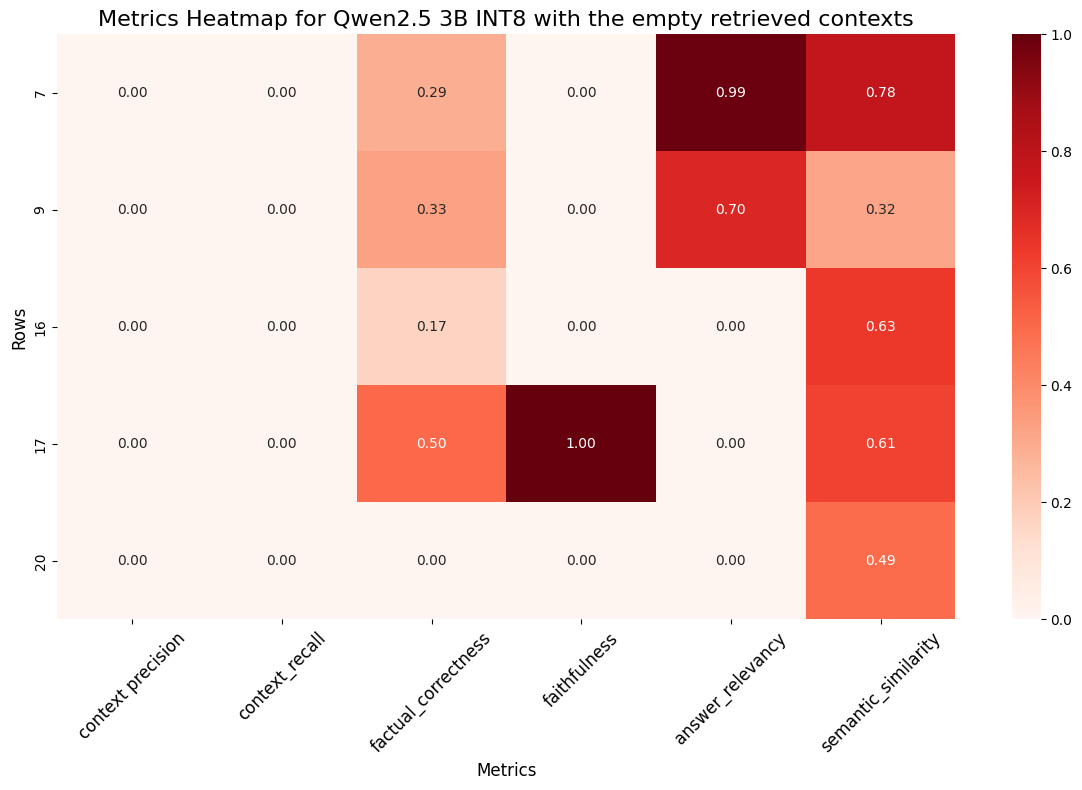

In [ ]:
# Creating heatmaps with custom y-axis labels for each model
import seaborn as sns
combined_filtered_df.rename(
    columns={"llm_context_precision_without_reference": "context precision"}, inplace=True
)
unique_models = combined_filtered_df['model_name'].unique()

metrics = [
    "context precision",
    "context_recall",
    "factual_correctness",
    "faithfulness",
    "answer_relevancy",
    "semantic_similarity"
]

custom_labels = [7, 9, 16, 17, 20]  # Custom labels for y-axis

for model_name in unique_models:
    model_data = combined_filtered_df[combined_filtered_df['model_name'] == model_name]

    # Use all rows from the model data
    heatmap_data = model_data[metrics]
    row_count = heatmap_data.shape[0]

    # Adjust the custom labels to match the row count dynamically
    adjusted_labels = custom_labels[:row_count]

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="Reds", cbar=True, xticklabels=metrics, yticklabels=adjusted_labels)

    # Customize the heatmap
    plt.title(f"Metrics Heatmap for {model_name} with the empty retrieved contexts", fontsize=16)
    plt.xlabel("Metrics", fontsize=12)
    plt.ylabel("Rows", fontsize=12)
    plt.xticks(rotation=45, fontsize=12)
    plt.tight_layout()

    # Show the heatmap
    plt.show()



In [ ]:
# Load the datasets
datasets = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Ensure all datasets are structured similarly for comparison
for name, df in datasets.items():
    print(f"Dataset: {name}\nColumns: {df.columns}\n")

Dataset: Gemma 2 2b
Columns: Index(['user_input', 'retrieved_contexts', 'response', 'reference',
       'llm_context_precision_without_reference', 'context_recall',
       'factual_correctness', 'faithfulness', 'answer_relevancy',
       'semantic_similarity'],
      dtype='object')

Dataset: Phi3.5 INT4
Columns: Index(['user_input', 'retrieved_contexts', 'response', 'reference',
       'llm_context_precision_without_reference', 'context_recall',
       'factual_correctness', 'faithfulness', 'answer_relevancy',
       'semantic_similarity'],
      dtype='object')

Dataset: Phi3.5 INT8
Columns: Index(['user_input', 'retrieved_contexts', 'response', 'reference',
       'llm_context_precision_without_reference', 'context_recall',
       'factual_correctness', 'faithfulness', 'answer_relevancy',
       'semantic_similarity'],
      dtype='object')

Dataset: Qwen2.5 0.5B
Columns: Index(['user_input', 'retrieved_contexts', 'response', 'reference',
       'llm_context_precision_without_refere

In [ ]:
# Extract the six relevant metrics from each dataset for comparison
metrics = [
    "llm_context_precision_without_reference",
    "context_recall",
    "factual_correctness",
    "faithfulness",
    "answer_relevancy",
    "semantic_similarity"
]

# Compute the mean of each metric for all datasets
summary = {}
for name, df in datasets.items():
    summary[name] = df[metrics].mean()

# Create a DataFrame for comparison
comparison_df = pd.DataFrame(summary).T

# Display the comparative analysis to the user
#import ace_tools as tools; tools.display_dataframe_to_user(name="Comparative Analysis of Metrics", dataframe=comparison_df)


In [ ]:
comparison_df.columns

Index(['llm_context_precision_without_reference', 'context_recall',
       'factual_correctness', 'faithfulness', 'answer_relevancy',
       'semantic_similarity'],
      dtype='object')

In [ ]:
comparison_df.to_csv('canva_results_CPU.csv')

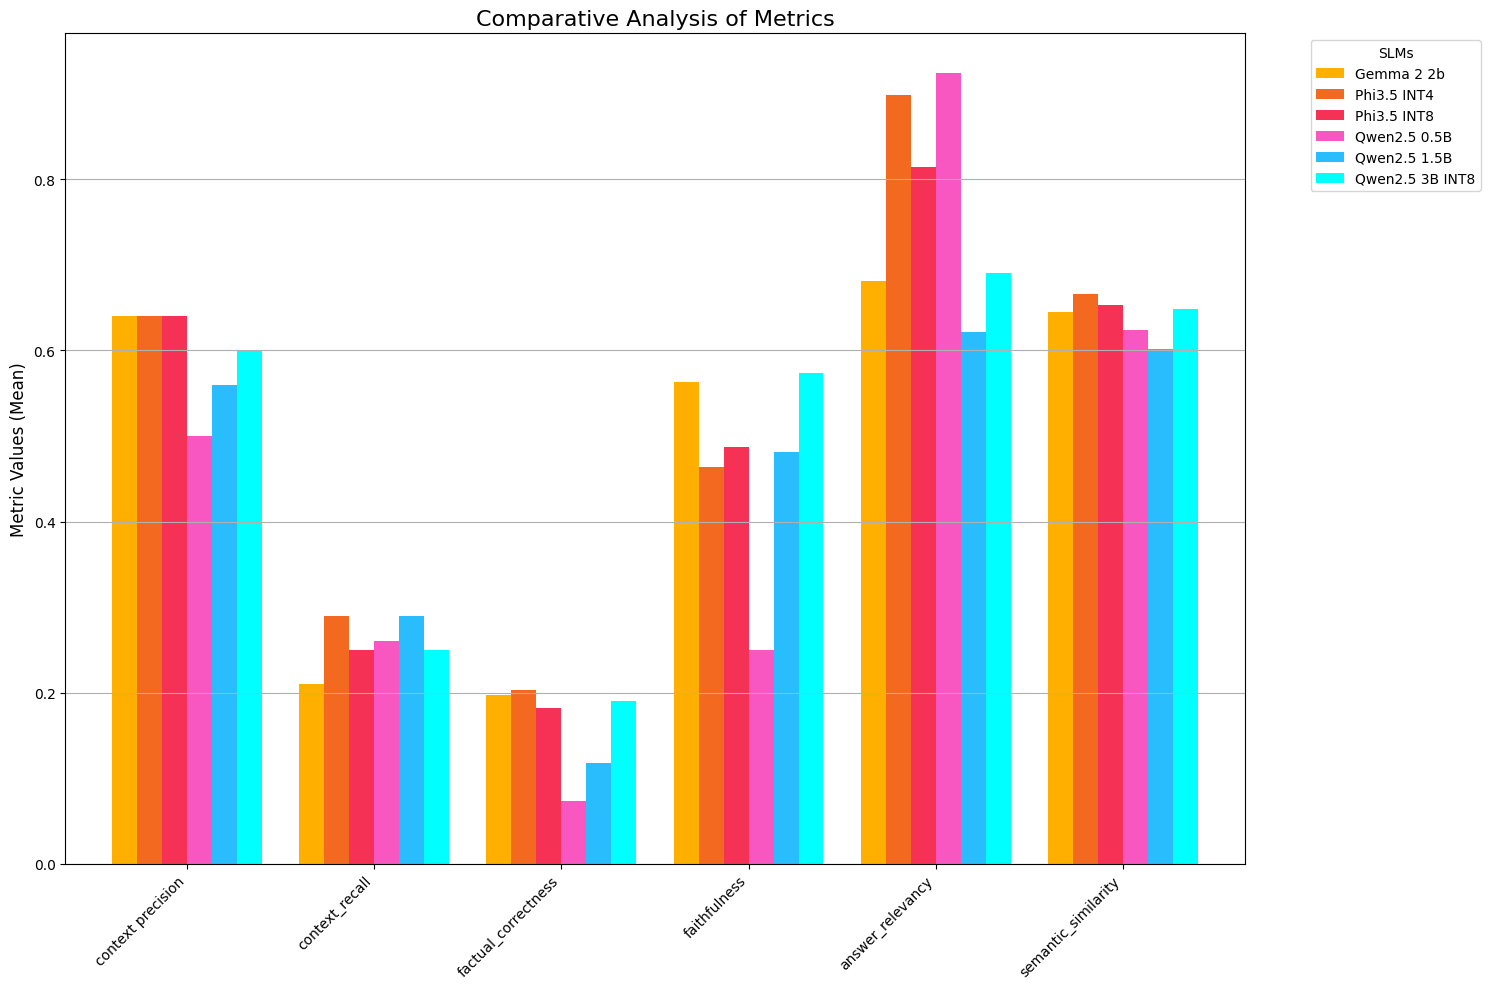

In [ ]:
comparison_df.rename(
    columns={"llm_context_precision_without_reference": "context precision"}, inplace=True
)



new_colors = ['#FFAF00', '#F46920', '#F53255', '#F857C1', '#29BDFD', '#00FFFF']  # Example palette

# Plot the comparative analysis of metrics
comparison_df.T.plot(kind='bar', figsize=(15, 10), width=0.8, color= new_colors)

# Add labels and title
plt.title('Comparative Analysis of Metrics', fontsize=16)
#plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Metric Values (Mean)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="SLMs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('comparative_analysis_OpenAI_2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:

file_paths_together = {
    "Gemma 2 2b": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/gemma_mean_metrics.csv',
    "Phi3.5 INT4": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/phi_int4_mean_metrics.csv',
    "Phi3.5 INT8": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/phi_int8_mean_metrics.csv',
    "Qwen2.5 0.5B": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/qwen_0.5b_mean_metrics.csv',
    "Qwen2.5 1.5B": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/qwen_1.5b_mean_metrics.csv',
    "Qwen2.5 3B INT8": '/gdrive/MyDrive/Tesi_magistrale/metrics/together/mean_metric/qwen_3b_mean_metrics.csv',
}


In [ ]:
# Read data into dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Merge dataframes by adding a column for the model name
merged_data = pd.concat([df.assign(Model=name) for name, df in dataframes.items()], ignore_index=True)

# Display the combined structure for clarity
merged_data.head()

,user_input,retrieved_contexts,response,reference,llm_context_precision_without_reference,context_recall,factual_correctness,faithfulness,answer_relevancy,semantic_similarity,Model
0,What are the typical winds in Genoa ?,"['French border) to Genova, then SE and S to P...",This text describes the winds in the Ligurian ...,The typical winds in Genoa are in winter from ...,1.0,0.0,0.40,1.0,0.720672,0.672932,Gemma 2 2b
1,What is the depth of the sea in the port of Al...,"[""No. 39070), a small port, lies at the SW end...",The depth of the sea in the port of Alassio is...,The average depth in the port of Alassio is 4m,1.0,0.0,0.00,0.0,0.995559,0.799733,Gemma 2 2b
2,What is the VHF channel of the port of imperia ?,['LAT 0.0m\nNote: Predicted heights are in me...,The VHF channel of the port of Imper is 12 and...,There are two VHF channels in the port of Impe...,1.0,1.0,1.00,1.0,0.853572,0.868213,Gemma 2 2b
3,Where is situated the Golfo Marconi ?,"[""Golfo Marconi\n10.20 Golfo Marconi (44°18'N....",The Golfo Marconi is situated between Punta di...,Marconi Gulf is located between Portofino and ...,1.0,0.0,0.33,1.0,0.881622,0.757194,Gemma 2 2b
4,Can you tell me the email address of the port ...,['Porto d’Ischia—Contact Information\nPort\nVH...,The email address for the Port of Ischia is u...,Ischia Harbor Email is ischia@guardiacostiera.it,1.0,0.0,0.00,1.0,0.940840,0.701448,Gemma 2 2b


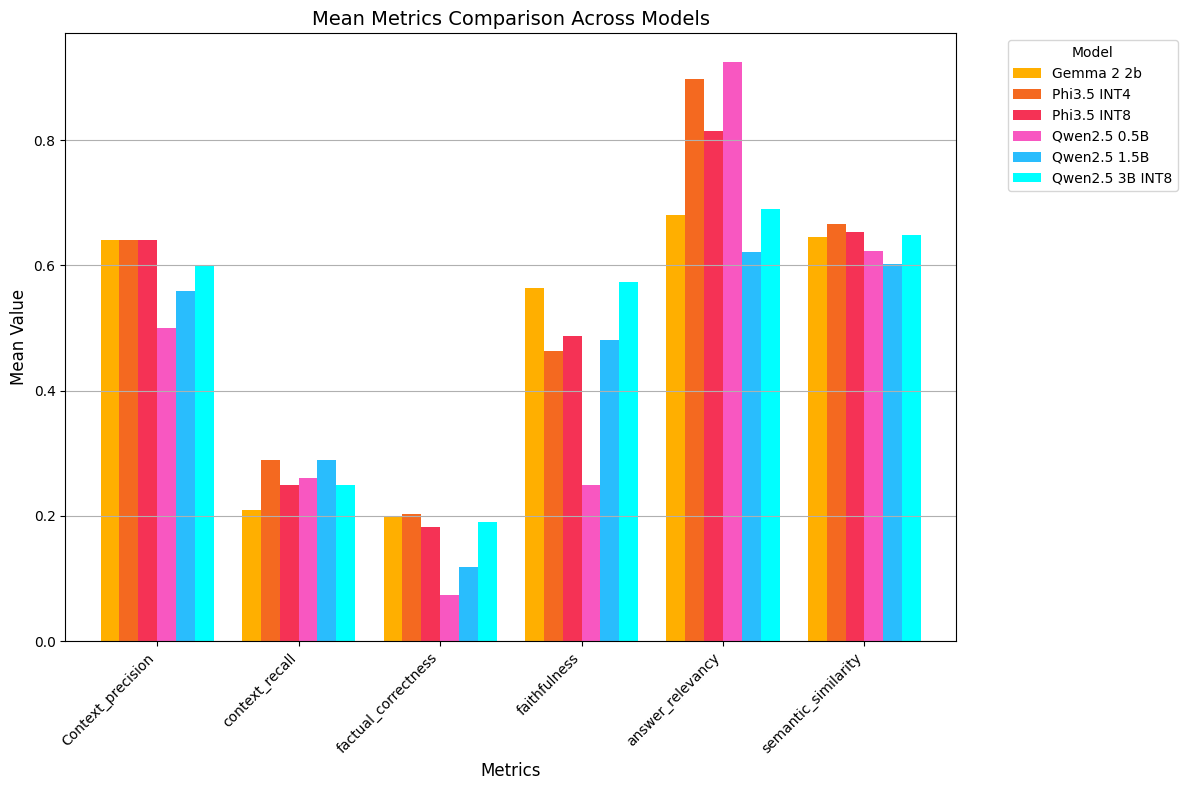

In [ ]:
# Average the metrics for each model
plot_data = merged_data.groupby("Model")[metrics].mean()
plot_data.rename(columns={"llm_context_precision_without_reference": "Context_precision"}, inplace=True)

# Replot the grouped bar chart with the updated metric name
plot_data.T.plot(kind="bar", figsize=(12, 8), width=0.8, color= new_colors)
plt.title("Mean Metrics Comparison Across Models", fontsize=14)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Mean Value", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")
plt.tight_layout()
plt.savefig("mean_metrics_together_2.png", dpi=300, bbox_inches="tight")
plt.show()


In [ ]:
from google.colab import files
files.download('mean_metrics_together_2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('comparative_analysis_OpenAI_2.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>